## 7. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download the data

In [156]:
import pandas as pd
import numpy as np
import os

In [157]:
#DATA_ROOT="/content/drive/MyDrive/AReM"
DATA_ROOT="/AReM"

files=[]
for folder in sorted(os.listdir(DATA_ROOT)):
  folder_path=os.path.join(DATA_ROOT,folder)
  if not os.path.isdir(folder_path):
    continue
  for filename in sorted(os.listdir(folder_path)):
    row={
        'folder':folder,
        'filename':filename
    }
    files.append(row)

df_info=pd.DataFrame(files)
df_info

,folder,filename
0,bending1,dataset1.csv
1,bending1,dataset2.csv
2,bending1,dataset3.csv
3,bending1,dataset4.csv
4,bending1,dataset5.csv
...,...,...
83,walking,dataset5.csv
84,walking,dataset6.csv
85,walking,dataset7.csv
86,walking,dataset8.csv


### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [158]:
def is_test(files):
  if files['folder'] in ['bending1','bending2']:
    return files['filename'] in ['dataset1.csv','dataset2.csv']
  else:
    return files['filename'] in ['dataset1.csv','dataset2.csv','dataset3.csv']

df_info['is_test']=df_info.apply(is_test,axis=1)
df_info.head()

,folder,filename,is_test
0,bending1,dataset1.csv,True
1,bending1,dataset2.csv,True
2,bending1,dataset3.csv,False
3,bending1,dataset4.csv,False
4,bending1,dataset5.csv,False


### (c) Feature Extraction: Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

#### i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc)

For each of the 6 time series, I will extract Minimum, Maximum, Mean, Median, Standard Deviation, 1st Quartile (25%), 3rd Quartile (75%)

This gives 7 features * 6 time series = 42 total features per instance.

#### ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.(20 pts)

Before reading the data, I manually removed a redundant comma in the last line of ./cycling/dataset9.csv and ./cycling/dataset14.csv.

Additionally, I applied a different parsing method to ./bending2/dataset4.csv due to its inconsistent format.

In [159]:
all_file_features=[]

for idx,files in df_info.iterrows():
    filepath=os.path.join(DATA_ROOT,files['folder'],files['filename'])
    #print(filepath)
    if os.path.join(files['folder'],files['filename'])=='bending2/dataset4.csv':
      df=pd.read_csv(filepath,skiprows=4,sep='\s+',engine='python')
    else:
      df=pd.read_csv(filepath,skiprows=4,sep=',')
    df=df.iloc[:,1:]  #drop first col(Columns: time)
    #print(df.head())

    file_features={}
    for i,col in enumerate(df.columns):
        x=df[col].values
        file_features[f'min{i+1}']=np.min(x)
        file_features[f'max{i+1}']=np.max(x)
        file_features[f'mean{i+1}']=np.mean(x)
        file_features[f'median{i+1}']=np.median(x)
        file_features[f'std{i+1}']=np.std(x)
        file_features[f'q1{i+1}']=np.percentile(x,25)
        file_features[f'q3{i+1}']=np.percentile(x,75)
    file_features['label']=files['folder']
    file_features['filename']=files['filename']
    file_features['is_test']=files['is_test']

    all_file_features.append(file_features)

df_features=pd.DataFrame(all_file_features)
df_features


,min1,max1,mean1,median1,std1,q11,q31,min2,max2,mean2,...,min6,max6,mean6,median6,std6,q16,q36,label,filename,is_test
0,37.25,45.00,40.624792,40.500,1.475428,39.25,42.0000,0.0,1.30,0.358604,...,0.0,1.92,0.570583,0.430,0.582308,0.00,1.3000,bending1,dataset1.csv,True
1,38.00,45.67,42.812812,42.500,1.434054,42.00,43.6700,0.0,1.22,0.372437,...,0.0,3.11,0.571083,0.430,0.600383,0.00,1.3000,bending1,dataset2.csv,True
2,35.00,47.40,43.954500,44.330,1.557210,43.00,45.0000,0.0,1.70,0.426250,...,0.0,1.79,0.493292,0.430,0.512971,0.00,0.9400,bending1,dataset3.csv,False
3,33.00,47.75,42.179812,43.500,3.666840,39.15,45.0000,0.0,3.00,0.696042,...,0.0,2.18,0.613521,0.500,0.523771,0.00,1.0000,bending1,dataset4.csv,False
4,33.00,45.75,41.678063,41.750,2.241152,41.33,42.7500,0.0,2.83,0.535979,...,0.0,1.79,0.383292,0.430,0.388759,0.00,0.5000,bending1,dataset5.csv,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.737266,31.67,38.2500,0.0,12.68,4.223792,...,0.0,9.39,3.288271,3.270,1.645811,2.05,4.3050,walking,dataset5.csv,False
84,21.50,51.00,34.935812,35.500,4.641102,32.00,38.0625,0.0,12.21,4.115750,...,0.0,10.21,3.280021,3.015,1.699145,2.12,4.5000,walking,dataset6.csv,False
85,18.33,47.67,34.333042,34.750,4.943612,31.25,38.0000,0.0,12.48,4.396958,...,0.0,8.01,3.261583,2.980,1.615604,2.05,4.3200,walking,dataset7.csv,False
86,18.33,45.75,34.599875,35.125,4.726858,31.50,38.0000,0.0,15.37,4.398833,...,0.0,8.86,3.289542,3.015,1.678418,2.12,4.2600,walking,dataset8.csv,False


#### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature. (10)

In [160]:
std_dict={}
for time_domain_feature in df_features.columns[:42]:
  std_dict[time_domain_feature]=np.std(df_features[time_domain_feature])
std_dict

{'min1': 9.515445066931843,
 'max1': 4.369322382962872,
 'mean1': 5.3053144612396865,
 'median1': 5.409056425357996,
 'std1': 1.7602191698745813,
 'q11': 6.118526249454475,
 'q31': 5.10964275336541,
 'min2': 0.0,
 'max2': 5.033881679163114,
 'mean2': 1.5651942520745679,
 'median2': 1.404197124172051,
 'std2': 0.8781516314077896,
 'q12': 0.9409936333203216,
 'q32': 2.1131565277371136,
 'min3': 2.9396159844182197,
 'max3': 4.8473579111726695,
 'mean3': 3.9855401730280393,
 'median3': 4.013396722341801,
 'std3': 0.9403347763270605,
 'q13': 4.196608356067417,
 'q33': 4.1478580691355535,
 'min4': 0.0,
 'max4': 2.1711830732344986,
 'mean4': 1.159469512097659,
 'median4': 1.139058054228987,
 'std4': 0.4551557623199605,
 'q14': 0.8388126951078968,
 'q34': 1.5436579285873868,
 'min5': 6.089106551460677,
 'max5': 5.708524426106136,
 'mean5': 5.643253378646845,
 'median5': 5.780655201421559,
 'std5': 1.0179958541711265,
 'q15': 6.061727225339022,
 'q35': 5.500200189394757,
 'min6': 0.045576965827

In [161]:
feature_values={}
for time_domain_feature,std in std_dict.items():
  feature=time_domain_feature[:-1]  #remove number，merge
  if feature not in feature_values:
    feature_values[feature]=[]
  feature_values[feature].append(std)
#print(feature_values)

In [162]:
import random

def bootstrap_ci(data,B=1000,ci=0.9):
  boot_samples=[np.std(np.random.choice(data,size=len(data),replace=True)) for _ in range(B)]
  lower=np.percentile(boot_samples,100*(1-ci)/2)
  upper=np.percentile(boot_samples,100*(1+ci)/2)
  return np.mean(boot_samples),lower,upper

bootstrap_results=[]
for feature,std_list in feature_values.items():
  mean_std,lower,upper=bootstrap_ci(std_list)
  bootstrap_results.append({
      'feature': feature,
      'bootstrap_std': mean_std,
      'ci_lower': lower,
      'ci_upper': upper
  })

df_std_ci=pd.DataFrame(bootstrap_results)
df_std_ci

,feature,bootstrap_std,ci_lower,ci_upper
0,min,3.148306,1.095530,4.339654
1,max,1.162451,0.453144,1.510365
2,mean,1.712315,1.036585,2.117653
3,median,1.797496,1.070756,2.195095
4,std,0.373664,0.175570,0.566437
5,q1,2.147787,1.257945,2.625700
6,q3,1.499247,0.959167,1.837857


#### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

In [163]:
df_std_ci=df_std_ci.sort_values(by='bootstrap_std',ascending=False)
df_std_ci

,feature,bootstrap_std,ci_lower,ci_upper
0,min,3.148306,1.095530,4.339654
5,q1,2.147787,1.257945,2.625700
3,median,1.797496,1.070756,2.195095
2,mean,1.712315,1.036585,2.117653
6,q3,1.499247,0.959167,1.837857
1,max,1.162451,0.453144,1.510365
4,std,0.373664,0.175570,0.566437


I mainly select the most important features based on their standard deviation. A larger std indicates greater variability across different instances, which often implies a higher potential for class separability.

Therefore, According to the result, the three features I selected are **min**, **q1**, and **median**

#### v. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 7(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the ISLR textbook). (10 pts)

In [164]:
df_train=df_features[df_features['is_test']==False].copy()
df_train['is_bending']=df_train['label'].str.contains('bending')
df_train

,min1,max1,mean1,median1,std1,q11,q31,min2,max2,mean2,...,max6,mean6,median6,std6,q16,q36,label,filename,is_test,is_bending
2,35.00,47.40,43.954500,44.330,1.557210,43.00,45.0000,0.0,1.70,0.426250,...,1.79,0.493292,0.430,0.512971,0.00,0.9400,bending1,dataset3.csv,False,True
3,33.00,47.75,42.179812,43.500,3.666840,39.15,45.0000,0.0,3.00,0.696042,...,2.18,0.613521,0.500,0.523771,0.00,1.0000,bending1,dataset4.csv,False,True
4,33.00,45.75,41.678063,41.750,2.241152,41.33,42.7500,0.0,2.83,0.535979,...,1.79,0.383292,0.430,0.388759,0.00,0.5000,bending1,dataset5.csv,False,True
5,37.00,48.00,43.454958,43.250,1.384653,42.50,45.0000,0.0,1.58,0.378083,...,5.26,0.679646,0.500,0.621885,0.43,0.8700,bending1,dataset6.csv,False,True
6,36.25,48.00,43.969125,44.500,1.616677,43.31,44.6700,0.0,1.50,0.413125,...,2.96,0.555312,0.490,0.487318,0.00,0.8300,bending1,dataset7.csv,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.737266,31.67,38.2500,0.0,12.68,4.223792,...,9.39,3.288271,3.270,1.645811,2.05,4.3050,walking,dataset5.csv,False,False
84,21.50,51.00,34.935812,35.500,4.641102,32.00,38.0625,0.0,12.21,4.115750,...,10.21,3.280021,3.015,1.699145,2.12,4.5000,walking,dataset6.csv,False,False
85,18.33,47.67,34.333042,34.750,4.943612,31.25,38.0000,0.0,12.48,4.396958,...,8.01,3.261583,2.980,1.615604,2.05,4.3200,walking,dataset7.csv,False,False
86,18.33,45.75,34.599875,35.125,4.726858,31.50,38.0000,0.0,15.37,4.398833,...,8.86,3.289542,3.015,1.678418,2.12,4.2600,walking,dataset8.csv,False,False


In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features=['min','q1','median']
selected_time_series=[1,2,6]
selected_columns=[f"{feature}{i}" for feature in selected_features for i in selected_time_series]

df_train_plot=df_train[selected_columns+['is_bending']].copy()
df_train_plot

,min1,min2,min6,q11,q12,q16,median1,median2,median6,is_bending
2,35.00,0.0,0.0,43.00,0.00,0.00,44.330,0.470,0.430,True
3,33.00,0.0,0.0,39.15,0.00,0.00,43.500,0.500,0.500,True
4,33.00,0.0,0.0,41.33,0.43,0.00,41.750,0.500,0.430,True
5,37.00,0.0,0.0,42.50,0.00,0.43,43.250,0.470,0.500,True
6,36.25,0.0,0.0,43.31,0.43,0.00,44.500,0.470,0.490,True
...,...,...,...,...,...,...,...,...,...,...
83,20.75,0.0,0.0,31.67,2.49,2.05,35.290,3.900,3.270,False
84,21.50,0.0,0.0,32.00,2.35,2.12,35.500,3.845,3.015,False
85,18.33,0.0,0.0,31.25,2.49,2.05,34.750,3.900,2.980,False
86,18.33,0.0,0.0,31.50,2.55,2.12,35.125,4.025,3.015,False


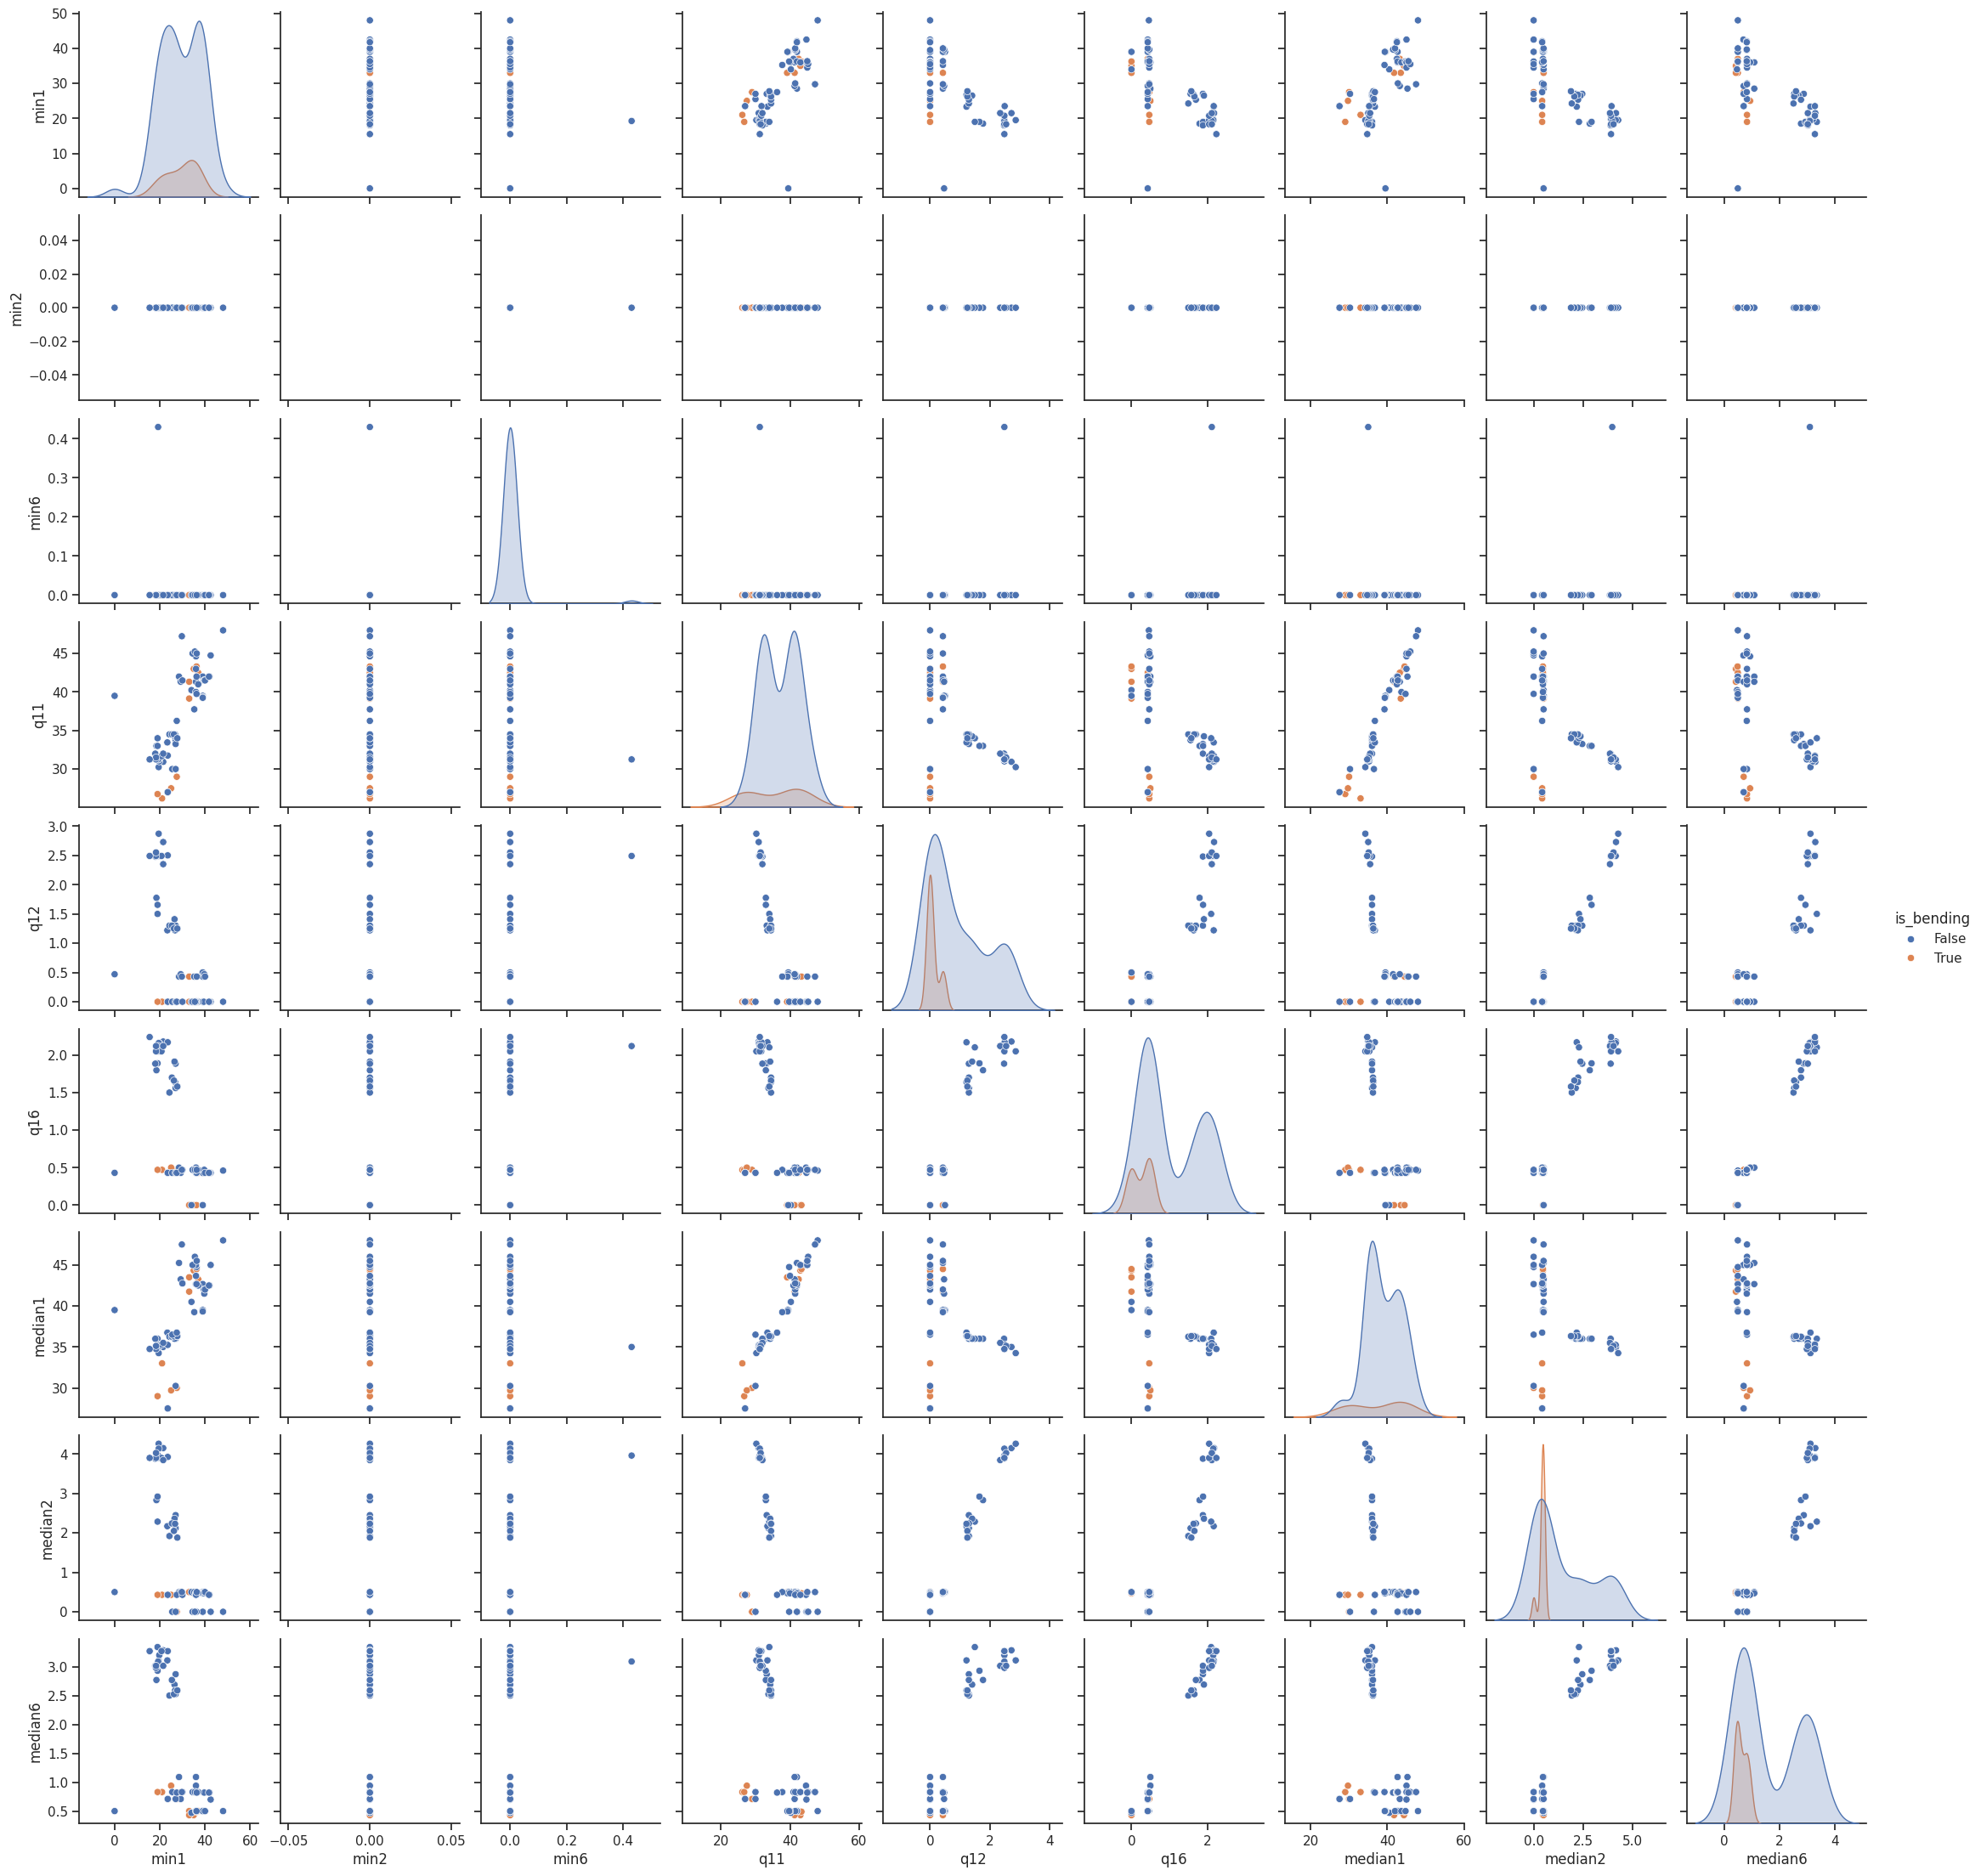

In [166]:
pairplot=sns.pairplot(df_train_plot,vars=selected_columns,hue='is_bending')
plt.show()